In [21]:
#!pip install pykrx

In [22]:
from pykrx import stock
import pandas as pd

In [23]:
# 데이터 가져오기
start = "20220101"
end = "20241231"
ticker = '105560' # KB금융
name = stock.get_market_ticker_name(ticker)
filename = f"{name}-{start}~{end}.csv"
df = stock.get_market_ohlcv(start, end, ticker)
df.head()

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2022-01-03,54900,55700,54800,55300,635124,0.545455
2022-01-04,55800,56400,55600,56400,927067,1.989150
2022-01-05,56400,57100,55800,56600,1429634,0.354610
2022-01-06,56600,56900,55500,55800,988985,-1.413428
2022-01-07,56000,56100,54800,55700,1193940,-0.179211


In [24]:
columns = {
    '시가': 'Open',
    '고가': 'High',
    '저가': 'Low',
    '종가': 'Close',
    '거래량': 'Volume'
}

# Rename columns and reset index
df2 = df.rename(columns=columns).reset_index()

# Rename the index column to 'Date'
df2.rename(columns={'날짜': 'Date'}, inplace=True)
df2.drop(columns=['등락률'], inplace=True)
print(f"saved -> {filename}")
df2.to_csv(filename, index=False)

saved -> KB금융-20220101~20241231.csv


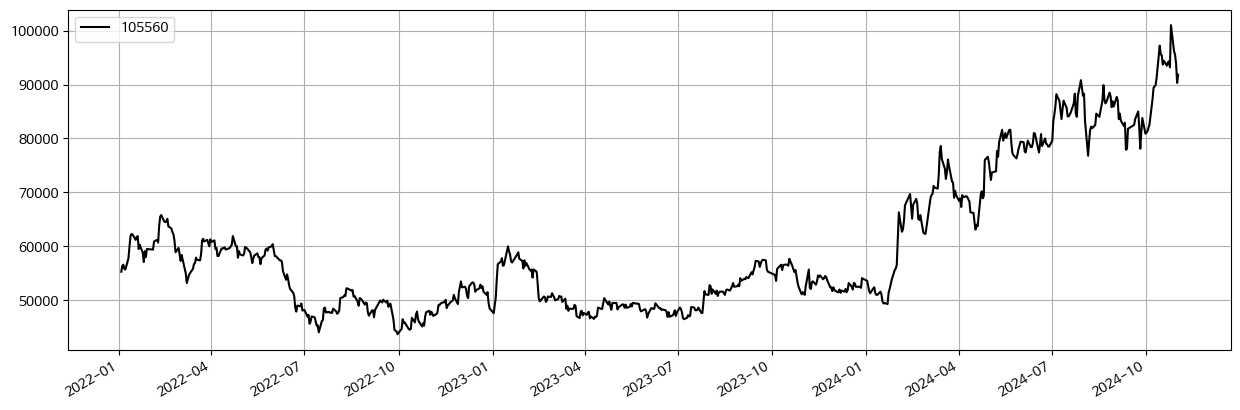

In [27]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Convert Date column to datetime if it isn't already
df2['Date'] = pd.to_datetime(df2['Date'])

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df2['Date'], df2['Close'], color='black', label=ticker)

# Set major x-axis locator to show every Nth date for better readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # adjust interval as needed
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and format dates for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.grid()
plt.show()